(200, 256, 256, 3)
Epoch 1/8


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_98']
Received: inputs=Tensor(shape=(None, 256, 256, 3))
  warnings.warn(msg)


6/6 ━━━━━━━━━━━━━━━━━━━━ 133s 21s/step - accuracy: 0.6980 - loss: 0.6348 - precision: 0.3281 - recall: 0.0671 - val_accuracy: 0.6873 - val_loss: 0.4492 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 124s 21s/step - accuracy: 0.7511 - loss: 0.4043 - precision: 0.5714 - recall: 0.0882 - val_accuracy: 0.3269 - val_loss: 6.7500 - val_precision: 0.3170 - val_recall: 0.9984
Epoch 3/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 125s 21s/step - accuracy: 0.6587 - loss: 2.7775 - precision: 0.4841 - recall: 0.6957 - val_accuracy: 0.8388 - val_loss: 0.3602 - val_precision: 1.0000 - val_recall: 0.4846
Epoch 4/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 123s 20s/step - accuracy: 0.8882 - loss: 0.3026 - precision: 1.0000 - recall: 0.5975 - val_accuracy: 0.9190 - val_loss: 0.3096 - val_precision: 0.9984 - val_recall: 0.7420
Epoch 5/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 124s 21s/step - accuracy: 0.9416 - loss: 0.2728 - precision: 0.9982 - recall: 0.7991 - val_accuracy: 0.9278 - val_loss: 0.2561 - val_precis

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_98']
Received: inputs=Tensor(shape=(32, 256, 256, 3))
  warnings.warn(msg)


1/2 ━━━━━━━━━━━━━━━━━━━━ 6s 7s/stepWARNING:tensorflow:5 out of the last 10 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002B43CA79DA0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step


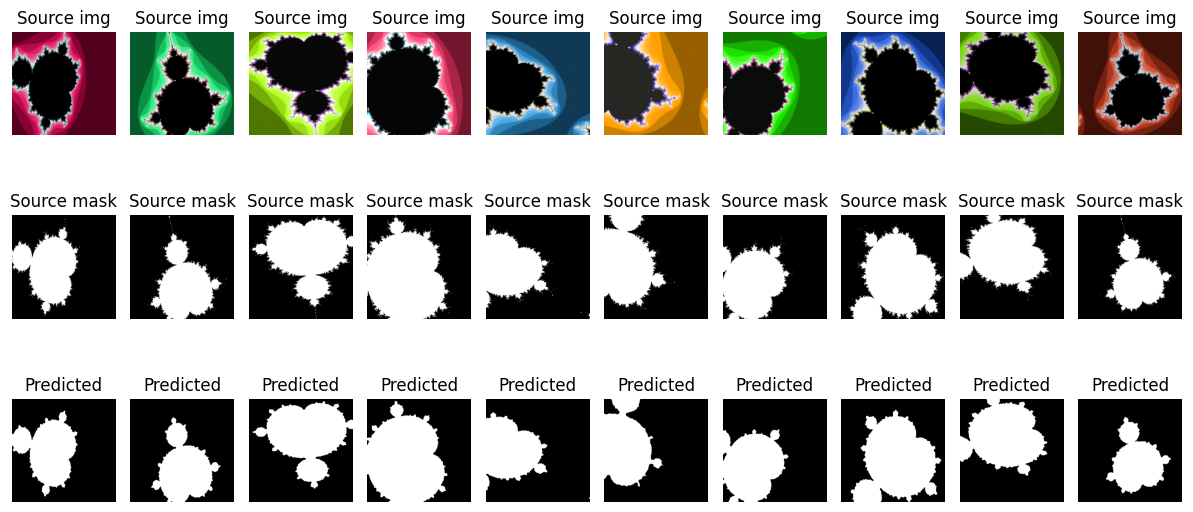

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tensorflow.keras import layers, Model

images = []
masks = []

img_height, img_width, channels = 256, 256, 3
num_images = 200


for i in range(num_images):
    img = cv2.imread(f"dataset/f{i+1}.png")
    mask = cv2.imread(f"dataset_masks/m{i+1}.png", cv2.IMREAD_GRAYSCALE)

    images.append(img / 255.0)
    masks.append(mask)

images = np.array(images)
masks = np.array(masks)

print(images.shape)

masks = np.where(masks > 0, 1, 0).astype(np.float32)
#images_flattened = images.reshape(images.shape[0], -1)

X_train, X_test, Y_train, Y_test = train_test_split(images, masks, test_size=0.3, random_state=42)


input_shape = (256, 256, 3)

inputs = layers.Input(shape=input_shape)

# Encoder
c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
p1 = layers.MaxPooling2D((2, 2))(c1)

c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
p2 = layers.MaxPooling2D((2, 2))(c2)

c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
p3 = layers.MaxPooling2D((2, 2))(c3)

c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
p4 = layers.MaxPooling2D((2, 2))(c4)

# Bootstrap
c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

# Decoder
u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = layers.concatenate([u6, c4])
c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = layers.concatenate([u7, c3])
c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = layers.concatenate([u8, c2])
c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = layers.concatenate([u9, c1])
c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

model = Model(inputs=[inputs], outputs=[outputs])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'precision', 'recall'])

model.fit(X_train, Y_train, epochs=8, batch_size=20, validation_split=0.2)


Y_pred = model.predict(X_test)
Y_pred = tf.round(Y_pred).numpy()


num_images = 10
plt.figure(figsize=(12, 6))

for i in range(num_images):
    plt.subplot(3, num_images, i + 1)
    plt.imshow(X_test[i].reshape(img_height, img_width, channels))
    plt.title('Source img')
    plt.axis('off')

    plt.subplot(3, num_images, i + 1 + num_images)
    plt.imshow(Y_test[i].reshape(img_height, img_width), cmap='gray')
    plt.title('Source mask')
    plt.axis('off')

    plt.subplot(3, num_images, i + 1 + 2 * num_images)
    plt.imshow(Y_pred[i].reshape(img_height, img_width), cmap='gray')
    plt.title('Predicted')
    plt.axis('off')

plt.tight_layout()
plt.show()

model.save('frankensteinII.keras')

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as tf

model = load_model('frankensteinII.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step


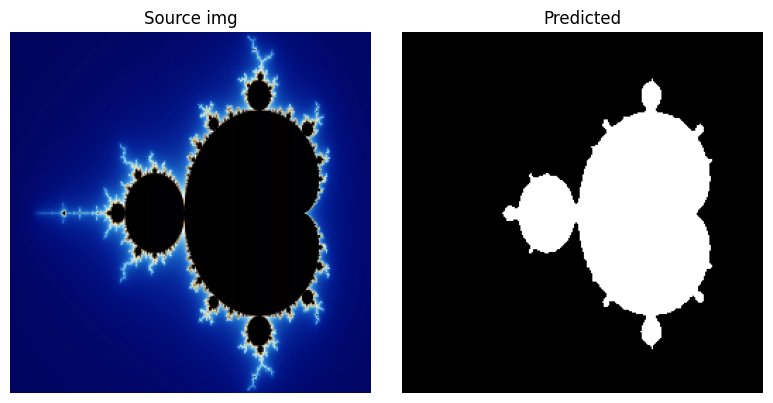

In [12]:
img = cv2.imread('lol.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgorig = cv2.resize(img, (256, 256))
img = np.array([imgorig / 255.0])
imgpred = model.predict(img)


Y_pred_single_reshaped = tf.round(imgpred).numpy().reshape(256, 256)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(imgorig)
plt.title('Source img')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(Y_pred_single_reshaped, cmap='gray')
plt.title('Predicted')
plt.axis('off')

plt.tight_layout()
plt.show()

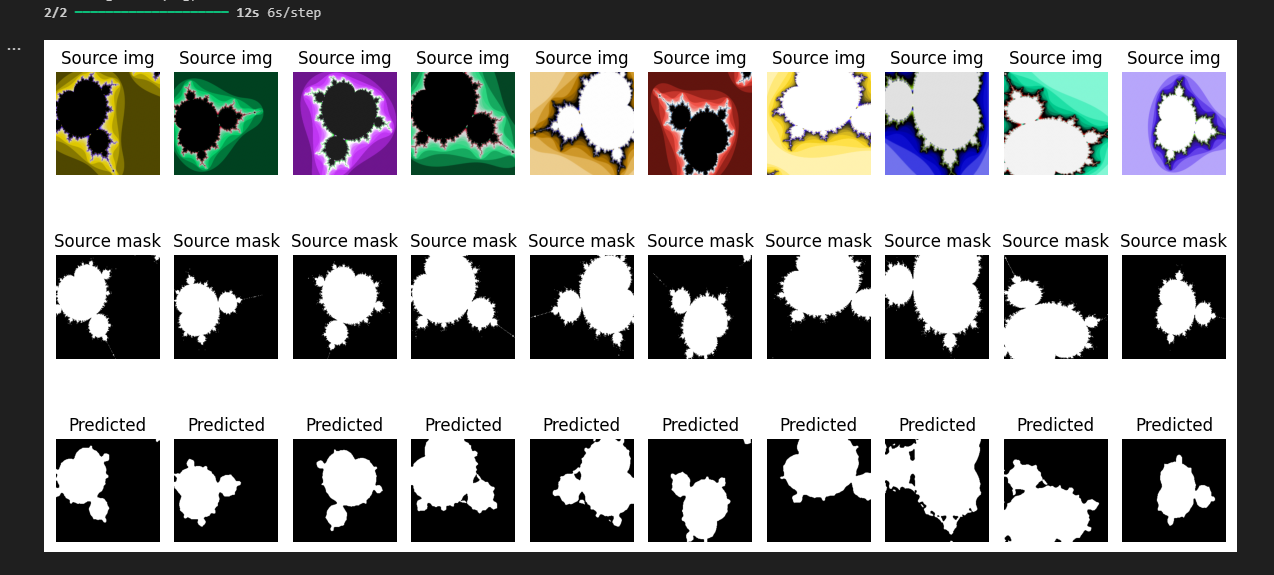

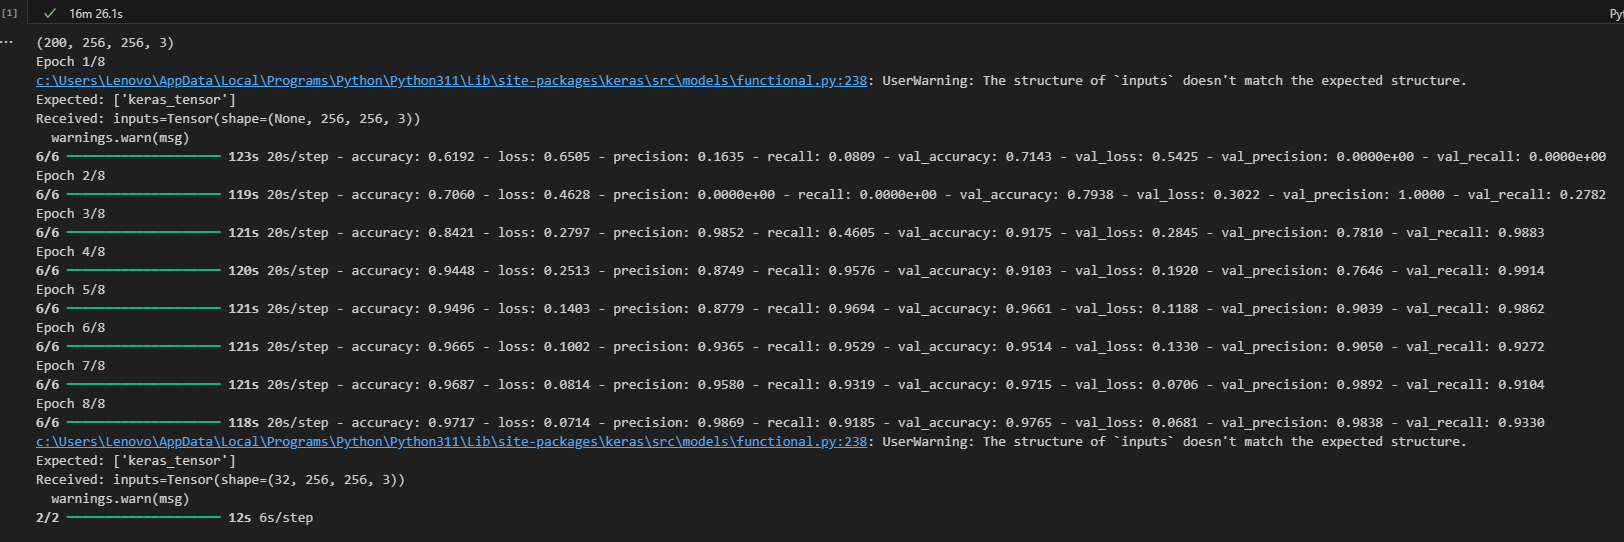